In [1]:
from IPython.display import display
import spot
spot.setup()

# Converting automata to strings

Use `to_str()` to output a string representing the automaton in different formats.

In [2]:
a = spot.translate('a U b')
for fmt in ('hoa', 'spin', 'dot', 'lbtt'):
    print(a.to_str(fmt))

HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc deterministic
properties: stutter-invariant terminal very-weak
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--
never {
T0_init:
  if
  :: (b) -> goto accept_all
  :: ((a) && (!(b))) -> goto T0_init
  fi;
accept_all:
  skip
}

digraph "" {
  rankdir=LR
  label=<[Büchi]>
  labelloc="t"
  node [shape="circle"]
  node [style="filled", fillcolor="#ffffaa"]
  fontname="Lato"
  node [fontname="Lato"]
  edge [fontname="Lato"]
  size="10.13,5" edge[arrowhead=vee, arrowsize=.7]
  I [label="", style=invis, width=0]
  I -> 1
  0 [label=<0>, peripheries=2]
  0 -> 0 [label=<1>]
  1 [label=<1>]
  1 -> 0 [label=<b>]
  1 -> 1 [label=<a &amp; !b>]
}

2 1
0 1 -1
1 "b"
0 & "a" ! "b"
-1
1 0 0 -1
1 t
-1



# Saving automata to files

Use `save()` to save the automaton into a file.

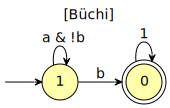

In [3]:
a.save('example.aut').save('example.aut', format='lbtt', append=True)

In [4]:
!cat example.aut

HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc deterministic
properties: stutter-invariant terminal very-weak
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--
2 1
0 1 -1
1 "b"
0 & "a" ! "b"
-1
1 0 0 -1
1 t
-1


# Reading automata from files

Use `spot.automata()` to read multiple automata from a file, and `spot.automaton()` to read only one.

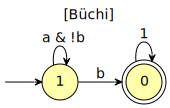

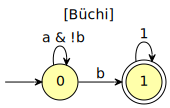

In [5]:
for a in spot.automata('example.aut'):
    display(a)

The `--ABORT--` feature of the HOA format allows discarding the automaton being read and starting over.

In [6]:
%%file example.aut
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 0
--ABORT--   /* the previous automaton should be ignored */
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--

Overwriting example.aut


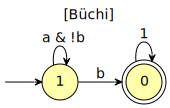

In [7]:
for a in spot.automata('example.aut'):
    display(a)

# Reading automata from strings

Instead of passing a filename, you can also pass the contents of a file.  `spot.automata()` and `spot.automaton()` look for the absence of newline to decide if this is a filename or a string containing some actual automaton text.

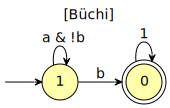

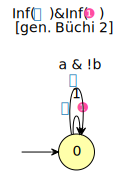

In [8]:
for a in spot.automata("""
HOA: v1
States: 2
Start: 1
name: "Hello world"
AP: 2 "a" "b"
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 0
State: 1
[1] 0
[0&!1] 1
--END--
HOA: v1
States: 1
Start: 0
name: "Hello world 2"
AP: 2 "a" "b"
Acceptance: 2 Inf(0)&Inf(1)
--BODY--
State: 0 {0}
[t] 0 {1}
[0&!1] 0
--END--
"""):
    display(a)

# Reading automata output from processes

If an argument of `spot.automata` ends with `|`, then it is interpreted as a shell command that outputs one automaton or more.

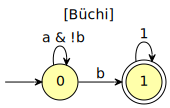

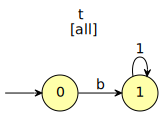

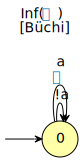

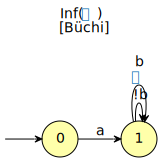

In [9]:
for a in spot.automata('ltl2tgba -s "a U b"; ltl2tgba --lbtt "b"|', 'ltl2tgba -H "GFa" "a & GFb"|'):
    display(a)

A single automaton can be read using `spot.automaton()`, with the same convention.

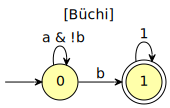

In [10]:
spot.automaton('ltl2tgba -s6 "a U b"|')

In [11]:
!rm example.aut